#### Dict

In [18]:
grades = {'jade': 90, 'mike': 20}
grades.get('jack', 0)  # Doesn't give an error returns zero if value can't be found
grades['jack'] = 20
print(f"We added Jack now Dict is: {grades}")
print(f"Keys: {grades.keys()}")  # list all keys
print(f"Values: {grades.values()}")  # list all values
print(f"items: {grades.items()}")  # list all items in tuples
items = grades.items()
sorted_grades = sorted(grades.items(),
            key = lambda grades_count: grades_count[0][0],
            reverse = False) #Sort values in grades based on Name
print(sorted_grades)
grades[('mike','wizowski')] = 20 #Key can be a Tuple

We added Jack now Dict is: {'jade': 90, 'mike': 20, 'jack': 20}
Keys: dict_keys(['jade', 'mike', 'jack'])
Values: dict_values([90, 20, 20])
items: dict_items([('jade', 90), ('mike', 20), ('jack', 20)])
[('jade', 90), ('jack', 20), ('mike', 20)]


In [25]:
from collections import defaultdict
'''
defaultdict is a class in the Python collections module that provides a 
convenient way to create dictionaries with default values for keys that 
have not been explicitly set.
''' 
dd_pair = defaultdict(lambda: [0,0]) #format of value
print(f"initial Dict is: {dd_pair}")
dd_pair[0][0] = 1 #{0: [1,0]}
dd_pair[1][0] = 1 #{0: [1,0], 1: [1,0]}
dd_pair[3]
print(f"after Modifications Dict is: {dd_pair.items()}")
wc = sorted(dd_pair.items(),
            key = lambda pair_count: pair_count[1][0])
print (f"sorted Dict: {wc}")

initial Dict is: defaultdict(<function <lambda> at 0x125503c40>, {})
after Modifications Dict is: dict_items([(0, [1, 0]), (1, [1, 0]), (3, [0, 0])])
sorted Dict: [(3, [0, 0]), (0, [1, 0]), (1, [1, 0])]


#### Error Catching

In [26]:
try:
    print(grades['Bob'])
except KeyError:
    print("no grade for bob")

x = None
try:
    assert x is None
except AssertionError:
    print ('x is not none')

checker = 'x is none' if x is None else 'all good'
print (checker)

no grade for bob
x is none


#### Continue and Break Loop

In [27]:
for x in range(10):
    if x == 3:
        continue
    if x == 5:
        break
    print (x)

0
1
2
4


#### All and Any

In [28]:
all([True,True,False]) #All is an AND Operator
any([True,True,False]) #Any is an OR Operator

True

# Object Oriented Programming

In [29]:
import datetime
my_date = datetime.date(2016,7,10)
class Employee:
    raise_amount = 1.04
    num_of_emps = 0
    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.pay = pay
        self.monthly_pay = int(int(pay)/12)
        Employee.num_of_emps += 1
    def __repr__(self) -> str: # creates a fallback function for __str__
        return (f"{self.first}, {self.last}, {self.pay}")
    def __str__(self) -> str: # changes what happens when we print an object
        return (f"{self.fullname} - {self.email}")
    def __add__(self, other):
        return self.pay + other.pay
    def __len__(self):
        return len(self.fullname)
    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amount)
    def from_string2(self,text):
        first,last,pay = text.split('-')
        self.first = first
        self.last = last
        self.pay = pay

    @property #after setting fullname to a property you need to remove all parentheses when calling.
    def fullname(self):
        return f"{self.first} {self.last}"
    
    @fullname.setter #helps in setting the fullname when setting the value
    def fullname(self,name):
        first,last = name.split(' ')
        self.first = first 
        self.last = last

    @fullname.deleter
    def fullname(self):
        print(f"{self.first} {self.last} has been deleted!")
        self.first = None 
        self.last = None
    @property #lets you change the property based on changes to other properties rather that being static
    def email(self):
        return f"{self.first}.{self.last}@company.com"
    @classmethod #a function to the class method
    def set_raise_amt(cls,amount):
        cls.raise_amount = amount
    @classmethod
    def from_string(cls,emp_str):
        first,last,pay = emp_str.split('-')
        return cls(first,last,pay)

    @staticmethod #a function that is independent of other variables and methods
    def is_workday(day):
        if day.weekday() == 5 or day.weekday() == 6:
            return False
        return True

class Developer(Employee): #inherited from Employee
    raise_amount = 1.10
    def __init__(self, first, last, pay, prog_lang):
        super().__init__(first,last,pay)
        self.prog_lang = prog_lang

class Manager(Employee): #inherited from Employee
    raise_amount = 1.30
    def __init__(self, first, last, pay, function, projects = None):
        super().__init__(first, last, pay)
        self.function = function
        if projects is None:
            self.projects = []
        else:
            self.projects = projects
    def add_proj(self,*proj):
        for j in proj:
            if j not in self.projects:
                self.projects.append(j)
    def remove_proj(self,*proj):
        for j in proj:
            if j in self.projects:
                self.projects.remove(j)

mgr_1 = Manager('Mehran','Moyaad',43200,'Data Science')
dev_1 = Developer('Rianna',"Beaton",2000, 'Python')
emp_1 = Employee('Mark','Schafer',5000)
emp_2 = Employee('Test','User',6000)
new_emp_1 = Employee.from_string("Ramy-Ahmed-23339")
new_emp_1.fullname
print(new_emp_1.fullname)
Employee.set_raise_amt(1.05)
print(emp_1.raise_amount)
print(Employee.is_workday(my_date))
print(dev_1.prog_lang)
print(f"{mgr_1.fullname} is a Manager in the {mgr_1.function} department and is payed {mgr_1.monthly_pay} monthly")

mgr_1.add_proj('KPI Adjustments','Employee Recognition')
print(mgr_1.projects)
mgr_1.remove_proj('Employee Recognition')
print(mgr_1.projects)
print(mgr_1 + dev_1) #runs the __add__ dunder method
print(mgr_1)
print(len(mgr_1)) #runs the __len__ dunder method
emp_1.first = 'Ramy'
print(emp_1.email) #now email is set to Ramy@company.com due to @property tag for the email function
emp_1.fullname = 'Ramy Ahmed' #This now pulls the fullname.setter method and assings first and last name
print(emp_1) #due to our email property this will show first, last, email attributes correctly for the new name
del emp_1.fullname #calls the @fullname.deleter property method and deletes full name
print(f"{new_emp_1.first} {new_emp_1.last} {new_emp_1.pay}")
new_emp_1.from_string2('Ramy-Ahmed-22222')
print(f"{new_emp_1.first} {new_emp_1.last} {new_emp_1.pay}")


<class 'str'>
Ramy Ahmed


In [30]:
class Sentence:
    def __init__(self,text) -> None:
        self.text = text
        self.index = 0
        self.lister = self.text.split(" ")
    def __iter__(self):
        return self
    def __next__(self):
        if self.index >= len(self.lister):
            raise StopIteration
        current = self.lister[self.index]
        self.index += 1
        return current

def sentence_gen(text):
    for word in text.split(" "):
        yield word
my_sentence = Sentence('This is a test')
my_sentence2 = sentence_gen("This is a test")
for word in my_sentence:
    print(word)

for word in my_sentence2:
    print(word)

        


This
is
a
test
This
is
a
test


# List & Generators

In [31]:
#list and generators
import random
names = ['Ramy', 'Alex', 'Mike', 'Igor','Sam','Stella']
majors = ['Engineering','History','Art','Math','Physics','Chemistry']
def people(num_of_people):
    result = []
    for i in range(num_of_people):
        person = {
            'id': i,
            'name': random.choice(names),
            'major': random.choice(majors)
        }
        result.append(person)
    return result 

def people_generator(num_of_people):
    for i in range(num_of_people):
        person = {
            'id': i,
            'name': random.choice(names),
            'major': random.choice(majors)
        }
        yield person

people_1 = people(100000)
people_2 = people_generator(100000)
print(people_1[0])
print(next(people_2)) #data is not saved in memeory and only generated when next is called or object is wrapped in list()


random_numbers = [x**x for x in range(20)] #Normal LC and saves all in memory
print(random_numbers[0])
random_numbers2 = (x**x for x in range(20)) #using () makes the LC a generator  
print(next(random_numbers2))

def make_word():
    word = ""
    for ch in "spam":
        word +=ch
        yield word

print(list(make_word()))


{'id': 0, 'name': 'Igor', 'major': 'Chemistry'}
{'id': 0, 'name': 'Ramy', 'major': 'Math'}
1
1
['s', 'sp', 'spa', 'spam']


# iterator and iterables

In [32]:
#
#iterables: Something that can be looped over
#iterables: can be looped over, object needs to return an iterator object from its dunder iter method. That iterator must define and dunder next method
#iterator an object that has a state that remembers its state and uses the next value 

nums = [1,2,3]
i_nums = iter(nums)
print(next(i_nums))
print(i_nums)

class MyRange:
    def __init__(self,start,end):
        self.value = start
        self.end = end
    def __iter__(self):
        return self
    def __next__(self):
        if self.value >= self.end:
            raise StopIteration
        current = self.value
        self.value += 1
        return current
    
nums = MyRange(1,10)

for num in nums:
    print(num)

print(next(nums))

1
1
2
3
4
5
6
7
8
9


StopIteration: 

# Regular Expressions

### Regular Expressions

.   - Any Character except New Line <br>
\d  - Digit (0-9) <br>
\D  - Not a Digit (0-9) <br>
\w  - Word Character (a-z,A-Z,0-9, _) <br>
\W  - Not a Word Character <br>
\s  - Whitespace (space, tab, newline) <br>
\S  - Not Whitespace (space,tab, newline) <br>

\b  - Word Boundry (Indicated by white space or non-alphanumeric character) <br>
\B  - Not a Word Boundry (Opposite of the above \b) <br>
^   - Beginning of a String (^beginning of string) <br>
$   - End of String (end of string\$) <br>

[]  - Match characters inside with an OR logic <br>
*example [-.] match characters either dash **OR** dot but only one instance of it, so 2-3-1 will match but 2--3--1 won't. can be digits ar letters too e.g [90] or [as]. Basically when you are saying this character or this character use a bracket* <br>
 <br>
\-   - Dash specifies a range within the closed brackets. <br>
*Example: [a-z] all letters between a to z*

\^   - Carrate negates the pattern <br>
*Example: \^[a-z] will take away anything that matches the pattern [a-z] <br>

|    - Either Or <br>
()   - Group

## Quantifiers
\*   - 0 or More
\+   - 1 or More
?    - 0 or One
{3}  - Exact Number
{3,4}- Range of Numbers (Min, Max)





In [ ]:
import re

In [ ]:
text_to_search = '''
abcdefghijklmnopqurtuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
1234567890

Ha HaHa

MetaCharacters (Need to be escaped):
. ^ $ * + ? { } [ ] \ | ( )

coreyms.com

321-555-4321
123.555.1234
123*555*1234
800-555-1234
900-555-1234

cat
pat
mat
bat

Mr. Schafer
Mr Smith
Ms Davis
Mrs. Robinson
Mr. T
'''

sentence = 'Start a sentence and then bring it to an end'

In [ ]:
# pattern = re.compile(r'\d{3}.\d{3}.\d{4}')
# pattern = re.compile(r'[a-zA-Z]') #All text that have a to z or A to Z
# pattern = re.compile(r'[^b]at')
pattern = re.compile(r'M(r|s|rs)\.?\s[A-Z]\w*')

matches = pattern.finditer(text_to_search)

for match in matches:
    print(match) 
#<re.Match object; span=(1, 4), match='abc'>
#span is the index range in the text that contains the match
    
# with open('test.txt','r') as f:
#     contents = f.read()
#     matches = pattern.finditer(contents)

#     for match in matches:
#         print(match)


<re.Match object; span=(238, 249), match='Mr. Schafer'>
<re.Match object; span=(250, 258), match='Mr Smith'>
<re.Match object; span=(259, 267), match='Ms Davis'>
<re.Match object; span=(268, 281), match='Mrs. Robinson'>
<re.Match object; span=(282, 287), match='Mr. T'>


In [ ]:
import re

emails = '''
CoreyMSchafer@gmail.com
corey.schafer@university.edu
corey-321-schafer@my-work.net
'''

pattern = re.compile(r'[a-zA-Z0-9.-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]+')

matches = pattern.finditer(emails)

for match in matches:
    print(match)

<re.Match object; span=(1, 24), match='CoreyMSchafer@gmail.com'>
<re.Match object; span=(25, 53), match='corey.schafer@university.edu'>
<re.Match object; span=(54, 83), match='corey-321-schafer@my-work.net'>


In [ ]:
urls = '''
https://www.google.com
http://coreyms.com
https://youtube.com
https://www.nasa.gov
'''
pattern = re.compile(r'https?://(www\.)?(\w+)(\.\w+)')
subbed_urls = pattern.sub(r'\2\3',urls)
print(subbed_urls)
matches = pattern.finditer(urls)
matches = pattern.findall(urls)
for match in matches:
    print(match)


google.com
coreyms.com
youtube.com
nasa.gov

('www.', 'google', '.com')
('', 'coreyms', '.com')
('', 'youtube', '.com')
('www.', 'nasa', '.gov')


# Decorators and Higher Level Functions

In [ ]:
def htmlTagger(tag):
    def wrapper(msg):
        print(f'<{tag}>{msg}</{tag}>')
    return wrapper

print_h1 = htmlTagger('h1')
print_h2 = htmlTagger('h2')

print_h1('Hello World')
print_h2('H2 World')

<h1>Hello World</h1>
<h2>H2 World</h2>


In [ ]:
from functools import wraps

def decorator_function(func):
    @wraps(func)
    def wrapper(*args,**kwargs):
        print(f"Hello there! You used {args} and {kwargs}")
        func(*args,**kwargs)
    return wrapper

def decorator_function2(func):
    @wraps(func)
    def wrapper(*args,**kwargs):
        print(f"How are we? you used {args} and {kwargs}")
        func(*args,**kwargs)
    return wrapper

@decorator_function
@decorator_function2
def display_info(*args,**kwargs):
    print(args)
    print(kwargs)

display_info("Hi","There")

Hello there! You used ('Hi', 'There') and {}
How are we? you used ('Hi', 'There') and {}
('Hi', 'There')
{}


# Premutations and Combinations

### Premutations

In [ ]:
# A Python program to print all 
# permutations of given length 
from itertools import permutations 
 
# Get all permutations of length 2 
# and length 2 
perm = permutations([1, 2, 3], 2) 
 
# Print the obtained permutations 
for i in list(perm): 
    print (i) 

(1, 2)
(1, 3)
(2, 1)
(2, 3)
(3, 1)
(3, 2)


### Combination

In [ ]:
# A Python program to print all 
# combinations of given length
from itertools import combinations
 
# Get all combinations of [1, 2, 3]
# and length 2
comb = combinations([1, 2, 3], 2)
 
# Print the obtained combinations
for i in list(comb):
    print (i)

(1, 2)
(1, 3)
(2, 3)


##### Interesting Recursion Excercise (Even Odd)

In [ ]:
import sys
arr = []
level = 0
def is_even(x):
    global level
    level = level + 1
    arr.append(x)
    if x == 0:
        return True
    else:
        return is_odd(x-1)

def is_odd(x):
    global level
    level = level + 1
    return not is_even(x)
print(sys.getrecursionlimit()) #Limit of recursions set by Python
is_odd(1485)
print(level)
print(arr)


3000
2972
[1485, 1484, 1483, 1482, 1481, 1480, 1479, 1478, 1477, 1476, 1475, 1474, 1473, 1472, 1471, 1470, 1469, 1468, 1467, 1466, 1465, 1464, 1463, 1462, 1461, 1460, 1459, 1458, 1457, 1456, 1455, 1454, 1453, 1452, 1451, 1450, 1449, 1448, 1447, 1446, 1445, 1444, 1443, 1442, 1441, 1440, 1439, 1438, 1437, 1436, 1435, 1434, 1433, 1432, 1431, 1430, 1429, 1428, 1427, 1426, 1425, 1424, 1423, 1422, 1421, 1420, 1419, 1418, 1417, 1416, 1415, 1414, 1413, 1412, 1411, 1410, 1409, 1408, 1407, 1406, 1405, 1404, 1403, 1402, 1401, 1400, 1399, 1398, 1397, 1396, 1395, 1394, 1393, 1392, 1391, 1390, 1389, 1388, 1387, 1386, 1385, 1384, 1383, 1382, 1381, 1380, 1379, 1378, 1377, 1376, 1375, 1374, 1373, 1372, 1371, 1370, 1369, 1368, 1367, 1366, 1365, 1364, 1363, 1362, 1361, 1360, 1359, 1358, 1357, 1356, 1355, 1354, 1353, 1352, 1351, 1350, 1349, 1348, 1347, 1346, 1345, 1344, 1343, 1342, 1341, 1340, 1339, 1338, 1337, 1336, 1335, 1334, 1333, 1332, 1331, 1330, 1329, 1328, 1327, 1326, 1325, 1324, 1323, 1322, 1321,

# MATPLOT LIB
_Don't forget to instal Matplot lib in you venv_

## 1- Line Graph

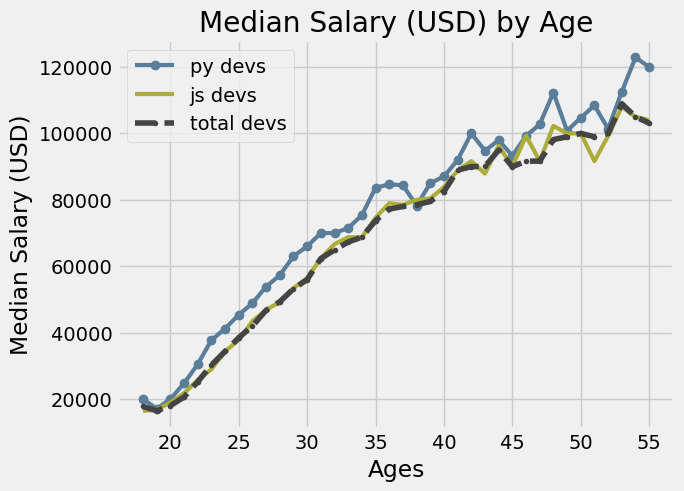

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcdefaults()
# print(plt.style.available) #this will output all the styles you can use
plt.style.use('fivethirtyeight')
# plt.xkcd() # commical style
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55] #ages


py_dev_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666,
            84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]

plt.plot(ages_x,py_dev_y,color = '#5a7d9a', marker = 'o',linewidth = 3,label = 'py devs')

js_dev_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000,
            78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]
plt.plot(ages_x,js_dev_y,color = '#adad3b',linewidth = 3,label = 'js devs')

dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]
plt.plot(ages_x,dev_y,color = '#444444', linestyle = '--',marker = '.',label = 'total devs')

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

# plt.legend(['total devs','py devs']) - you can use this to place legend details or add label directly on plot like above
plt.legend()
plt.grid(True)
# plt.tight_layout()

plt.show()

## 1.1 Fill line Plots

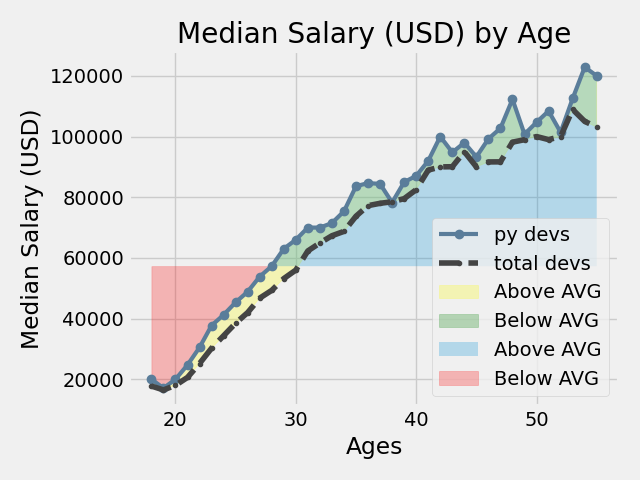

In [4]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib widget
plt.clf()

plt.rcdefaults()
# plt.style.available #this will output all the styles you can use
plt.style.use('fivethirtyeight')
# plt.xkcd() # commical style
ages_x = np.array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]) #ages


py_dev_y = np.array([20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666,
            84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000])

plt.plot(ages_x,py_dev_y,color = '#5a7d9a', marker = 'o',linewidth = 3,label = 'py devs')

dev_y = np.array([17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117])
plt.plot(ages_x,dev_y,color = '#444444', linestyle = '--',marker = '.',label = 'total devs')

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
overall_median = 57287
plt.fill_between(ages_x, py_dev_y, dev_y,
         where = (py_dev_y > dev_y),color = 'yellow',interpolate = True, alpha = 0.25, label = 'Above AVG')
plt.fill_between(ages_x, py_dev_y, dev_y,
         where = (py_dev_y <= dev_y),color = 'green',interpolate = True, alpha = 0.25, label = 'Below AVG')

plt.fill_between(ages_x, py_dev_y, overall_median,
         where = (py_dev_y > overall_median),interpolate = True, alpha = 0.25, label = 'Above AVG')
plt.fill_between(ages_x, py_dev_y, overall_median,
         where = (py_dev_y <= overall_median),color = 'red',interpolate = True, alpha = 0.25, label = 'Below AVG')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

## 2- Bar Charts

#### Vertical Bars

In [ ]:

plt.clf()
x_indexes = np.arange(len(ages_x))
print(len(ages_x))
width = 0.25
plt.bar(x_indexes + width,py_dev_y,width = width,color = '#5a7d9a',label = 'py devs')
plt.bar(x_indexes,js_dev_y,width = width,color = '#adad3b',label = 'js devs')
plt.bar(x_indexes - width,dev_y,width = width,color = '#444444',label = 'total devs')
plt.legend()
plt.xticks(ticks=x_indexes,labels=ages_x)
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

# plt.legend(['total devs','py devs']) - you can use this to place legend details or add label directly on plot like above

plt.grid(True)
plt.tight_layout()


plt.show()

### Horizontal bars

38


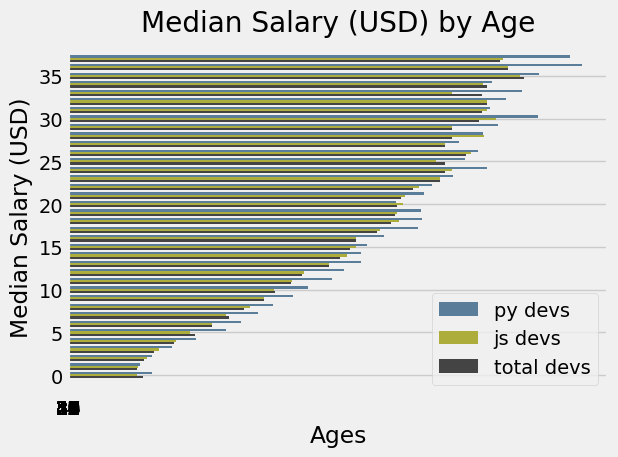

In [ ]:
x_indexes = np.arange(len(ages_x))
print(len(ages_x))
height = 0.25
plt.barh(x_indexes + height,py_dev_y,height = height,color = '#5a7d9a',label = 'py devs')
plt.barh(x_indexes,js_dev_y,height = height,color = '#adad3b',label = 'js devs')
plt.barh(x_indexes - height,dev_y,height = height,color = '#444444',label = 'total devs')
plt.legend()
plt.xticks(ticks=x_indexes,labels=ages_x)
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

# plt.legend(['total devs','py devs']) - you can use this to place legend details or add label directly on plot like above

plt.grid(True)
plt.tight_layout()


plt.show()

## 2.1 Import from CSV

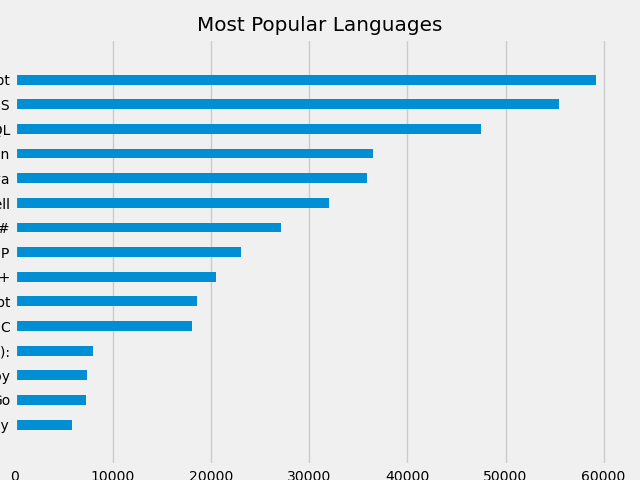

In [9]:
from matplotlib import pyplot as plt
import csv
from collections import Counter
import numpy as np
import pandas as pd
%matplotlib widget
plt.clf()
plt.rcdefaults()
# plt.style.available #this will output all the styles you can use
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10

#import with CSV module
# with open('data.csv') as csv_file:
#     csv_reader = csv.DictReader(csv_file)
#     language_counter = Counter()
#     for row in csv_reader:
#         language_counter.update(row['LanguagesWorkedWith'].split(';'))

#import with pandas
data = pd.read_csv('data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']
language_counter = Counter()
for response in lang_responses:
        language_counter.update(response.split(';'))

languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()
plt.barh(languages,popularity, height = 0.4)
plt.grid(None)
plt.title("Most Popular Languages")
plt.ylabel("Programming Languages")
plt.xlabel("Number of People who use")
plt.margins(y=0.1)
plt.grid(axis = 'x')
# plt.tight_layout()
plt.show()

# 3- Pie Charts

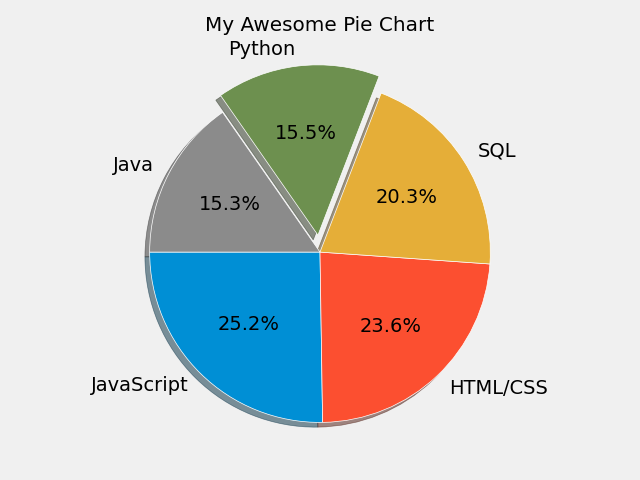

In [10]:
plt.rcdefaults()
plt.clf()
plt.style.use("fivethirtyeight")

# Language Popularity
slices = [59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0,0,0,0.1,0]
plt.pie(slices[:5], 
        labels = labels[:5],
        explode = explode,
        autopct = '%1.1f%%',
        shadow = True, startangle= 180,
        wedgeprops ={'edgecolor':'white'})

plt.rcParams['font.size'] = 10
plt.title("My Awesome Pie Chart")
# plt.tight_layout()
plt.show()

# 4- Stack Plots

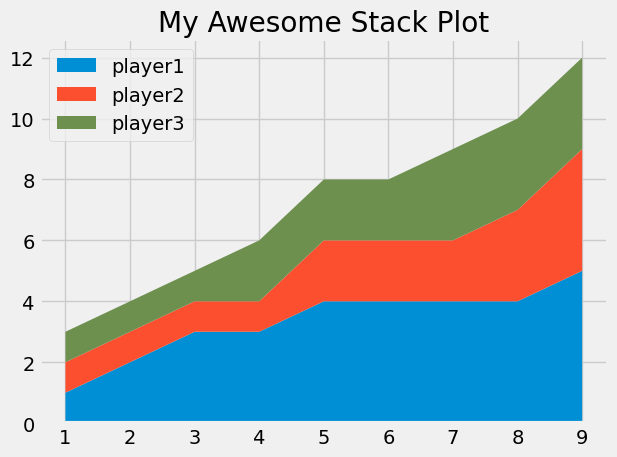

In [ ]:
plt.rcdefaults()
plt.style.use("fivethirtyeight")
minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [1, 2, 3, 3, 4, 4, 4, 4, 5]
player2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
player3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]
labels = ['player1','player2','player3']
colors = ['#008fd5','#fc4f30','#6d904f']
plt.stackplot(minutes,player1,player2,player3,
              labels = labels,
              colors = colors
              )
plt.legend(loc = 'upper left')
plt.title("My Awesome Stack Plot")
plt.tight_layout()
plt.show()

# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

# 5- Histograms

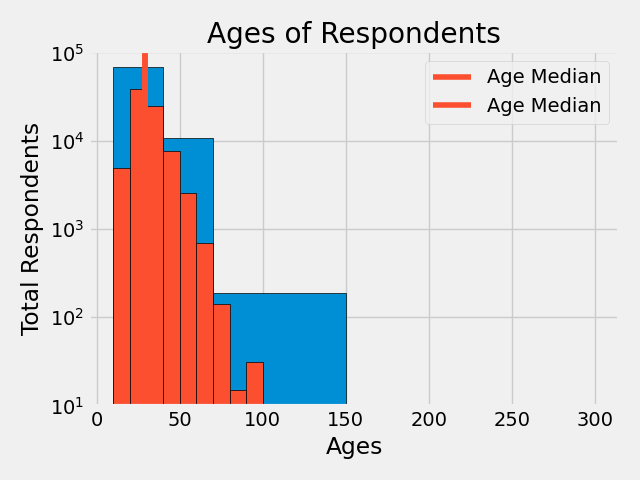

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
data = pd.read_csv('data2.csv')
ids = data['Responder_id']
ages = data['Age']
# ages = [18, 19, 21, 25, 26, 26, 30, 32, 38, 45, 55]
bins = [10,20,30,40,50,60,70,80,90,100]
plt.hist(ages, bins = bins, edgecolor = 'black', log = True)



median_age = 29
color = '#fc4f30'
plt.axvline(median_age,color = '#fc4f30', label = 'Age Median')
plt.legend()

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.tight_layout()

plt.show()

# 6- Scatter Plot

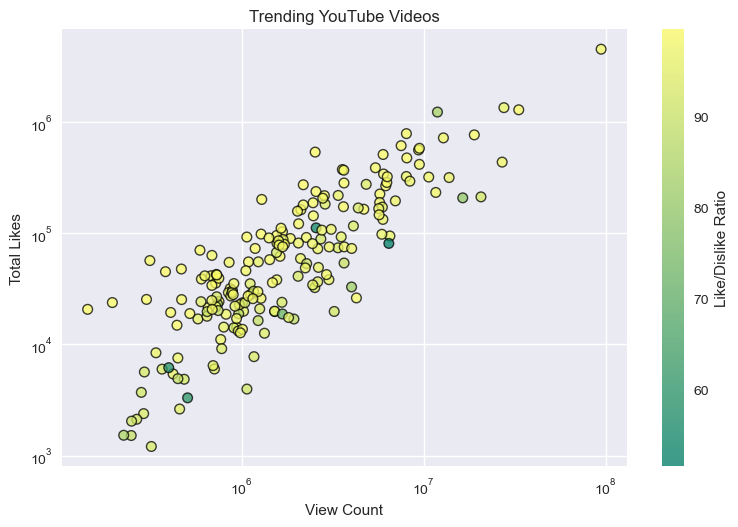

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn-v0_8')

# x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
# y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]
# colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]
# sizes = [209, 486, 381, 255, 191, 315, 185, 228, 174,
#          538, 239, 394, 399, 153, 273, 293, 436, 501, 397, 539]
# plt.scatter(x,y, s=sizes,c = colors,cmap = 'Greens', edgecolor = 'black',linewidths=1,alpha = 0.75)

# cbar = plt.colorbar()
# cbar.set_label('Satisfaction')

data = pd.read_csv('2019-05-31-data.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

plt.scatter(view_count,likes, c = ratio, cmap = 'summer'
            ,edgecolor = 'black',linewidths=1,alpha = 0.75)

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')
plt.xscale('log')
plt.yscale('log')
plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

plt.show()

# 7- Time Series Data

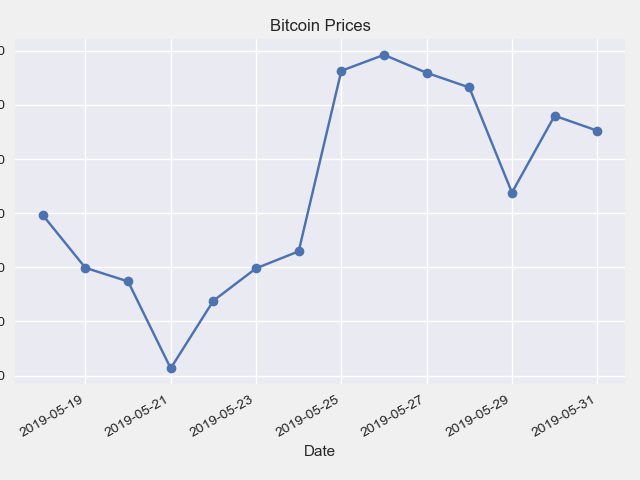

In [13]:

import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
%matplotlib widget
plt.clf()
plt.rcdefaults()
plt.style.use('seaborn-v0_8')

# dates = [
#     datetime(2019,5,24),
#     datetime(2019,5,25),
#     datetime(2019,5,26),
#     datetime(2019,5,27),
#     datetime(2019,5,28),
#     datetime(2019,5,29),
#     datetime(2019,5,30)
# ]
# y = [0,1,3,4,6,5,7]

# plt.plot_date(dates,y, linestyle = 'solid')
# plt.gcf().autofmt_xdate() #GET CURRENT FIGURE
# date_format = mpl_dates.DateFormatter('%b,%d %Y')
# plt.gca().xaxis.set_major_formatter(date_format) #GET CURRENT AXIS

data = pd.read_csv('timeseries.csv')

data['Date'] = pd.to_datetime(data['Date']) #converts the Date column to a date format
data.sort_values('Date', inplace = True) #inplace stops me from saying data['Date'] = data['Date']
price_date = data['Date']
price_close = data['Close']

plt.plot_date(price_date,price_close, linestyle = 'solid')
plt.gcf().autofmt_xdate() #GET CURRENT FIGURE

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# 8- Live Data Plotting

In [ ]:

import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget
plt.clf()
plt.style.use('fivethirtyeight')

# x_vals = [0,1,2,3,4,5]
# y_vals = [0,1,3,2,3,5]

# plt.plot(x_vals,y_vals)

x_vals = []
y_vals = []

index = count()

def animate():
    # x_vals.append(next(index))
    # y_vals.append(random.randint(0,5))
    data = pd.read_csv('live_data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']
    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')
    
    plt.legend(loc = 'upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(),animate,interval = 1000,cache_frame_data=False)


plt.show()



/var/folders/2j/_951ntz13pqd7tk3_7btw5rr0000gn/T/ipykernel_69496/1712427066.py:20: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(plt.gcf(), animate, interval = 1000) # FuncAn is going to get current figure and plot it in animation at the set interval. Interval is in milli sec


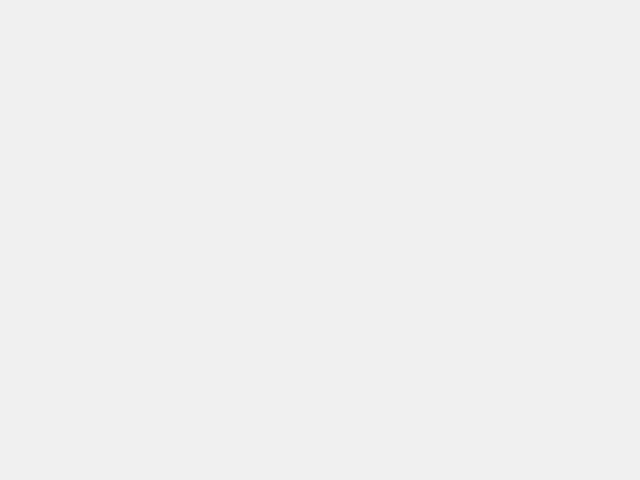

In [2]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget
plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))
    plt.cla()
    plt.plot(x_vals, y_vals) # the plot is inside the function as it will plot a new line everytime it gets a new value

ani = FuncAnimation(plt.gcf(), animate, interval = 1000) # FuncAn is going to get current figure and plot it in animation at the set interval. Interval is in milli sec


plt.tight_layout()
plt.show()

# 9- Subplots

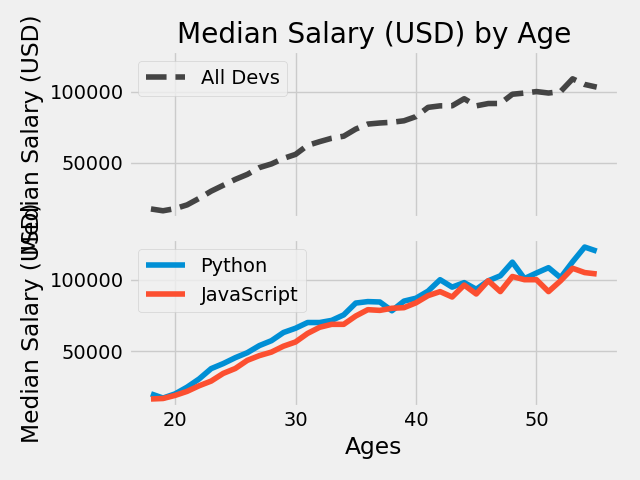

In [19]:

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget
plt.style.use('fivethirtyeight')

data = pd.read_csv('subplot_data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']
 #One Figure two axis
fig,(ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, sharey = True)

# two figs two axis
# fig1,ax1 = plt.subplots() 
# fig2,ax2 = plt.subplots()

ax1.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')


ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()
#Save Figs
# fig1.savefig('fig1.png')
# fig2.savefig('fig2.png')

Text(0.0, 1.0, 'Axes')

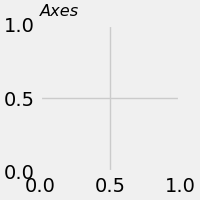

In [17]:
fig,ax = plt.subplots(figsize=(2,2), facecolor = 'lightskyblue', layout='constrained')
ax.set_title('Axes', loc='left', fontstyle='oblique', fontsize='small')

# Matplot Lib Summary

### Add to End of Code
```
plt.title('Custom Title')
plt.xlabel('X-Label')
plt.ylabel('Y-Label')
plt.legend()
plt.grid(True|False)
plt.tight_layout()
plt.show()
```
### Line Graph
```
plt.plot(x_axis,y_axis,
        color = '#5a7d9a', 
        marker = 'o',
        linewidth = 3,
        label = 'Custom Label'))
        
    # Fill Line Plot
    plt.fill_between(x_axis, y_axis1, y_axis2,
             where = (y_axis1 > y_axis2),
             color = 'yellow',
             interpolate = True, 
             alpha = 0.25, 
             label = 'Custom Label')
```
### Bar Charts
```
plt.bar(x_axis,y_axis,
        width = {int: value},
        color = {string: color},
        label = {string: Label})
```
### Horizontal Bar Chart
```
plt.barh(x_axis,y_axis,
        width = {int: value},
        color = {string: color},
        label = {string: Label})
```
### Pie Charts
```
plt.pie(slices,labels,
        explode = [0,0,0.1,0]), #which slice
        autopct = '%1.1f%%', #format percent
        shadow = True|False, #add shadow
        startangle = 180, #Rotate
        wedgeprops = {'edgecolor':'white'})
```
### Stack Plots
```
plt.stackplot(x_axis, y1,y2,y3,y4,
        labels = [y1_label,y2_label...]),
        colors = [y1_color,y2_color...])
```
### Histogram
```
plt.hist(x_axis,bins,
        edgecolor = 'bin edge color'),
        log = True | False)
plt.axvline(x_avg_value,   #OPTIONAL
        color = 'line color', 
        label = 'x_avg_label')
```
### Scatter Plot
```
plt.scatter(x_axis,y_axis, 
        c = ratio, #color changes
        cmap = 'summer', #Color Maps
        edgecolor = 'dot border',
        linewidths= 1,
        alpha = 0.75)
plt.colorbar() #shows a color bar next to graph ### OPTIONAL
```
### Subplots
```
fig1,ax1 = plt.subplots() 
fig2,ax2 = plt.subplots()
#can add more graphs to same figure by using fig2,[ax2,ax3]
ax1.{any charts type} #i.e ax1.plot(x_axis,y_axis,...)
ax2.{any charts from above}

ax1.legend()
ax1.set_title(first graph in first figure title)
ax1.set_ylabel(first graph in first figure title)

ax2.legend()
ax2.set_title(first graph in second figure title)
ax2.set_ylabel(first graph in second figure title)
```

# Read CSV
https://youtu.be/q5uM4VKywbA?si=a0dPkIOzoKJd5OBq

In [5]:
import csv

with open('read_csv.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)

    with open('new_file.csv','w') as new_file:
        csv_writer = csv.writer(new_file,delimiter='\t')
        for line in csv_reader:
            csv_writer.writerow(line)


In [8]:
N = 9
M = 27
middle = 1
#Top
for i in range(1,int((N+1)/2)):
    print('-'*(int((M-(middle*3))/2))+".|."*middle+'-'*(int((M-(middle*3))/2)))
    middle += 2
#Middle
print('-' * (int((M - len('WELCOME'))/2)) + "WELCOME" + '-' * (int((M - len('WELCOME'))/2)))

middle -= 2
#Bottom
for i in range(1,int((N+1)/2)):
    print('-'*(int((M-(middle*3))/2))+".|."*middle+'-'*(int((M-(middle*3))/2)))
    middle -= 2

------------.|.------------
---------.|..|..|.---------
------.|..|..|..|..|.------
---.|..|..|..|..|..|..|.---
----------WELCOME----------
---.|..|..|..|..|..|..|.---
------.|..|..|..|..|.------
---------.|..|..|.---------
------------.|.------------
